In [1]:
using Images

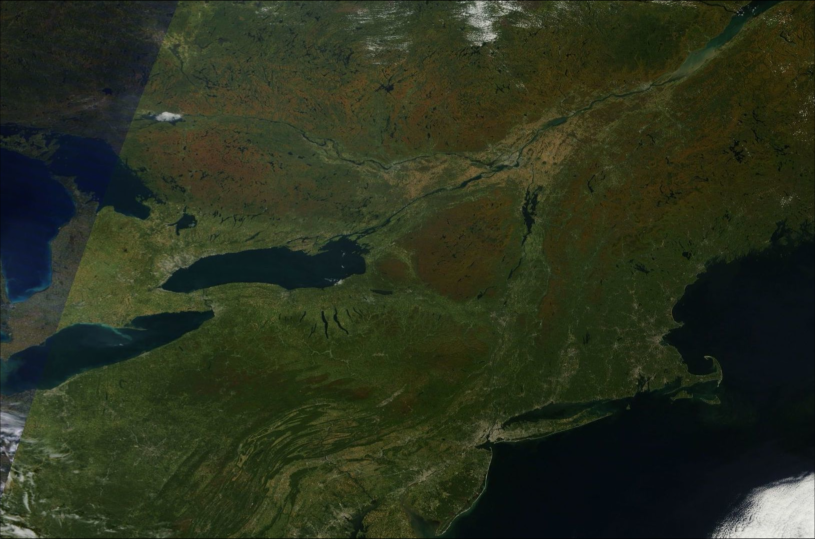

.UnsafeContiguousView{T, N} where N where T})(Ptr{T}, Int64, Tuple{Vararg{Int64, N}}) in module ArrayViews at C:\Users\rm949\.julia\v0.6\ArrayViews\src\arrviews.jl:18 overwritten at C:\Users\rm949\.julia\v0.6\ArrayViews\src\arrviews.jl:26.


In [2]:
using ImageView
using LowRankModels
using Convex
using FileIO
using Colors
using SCS
img = load("./2014/9.27.14.jpeg")

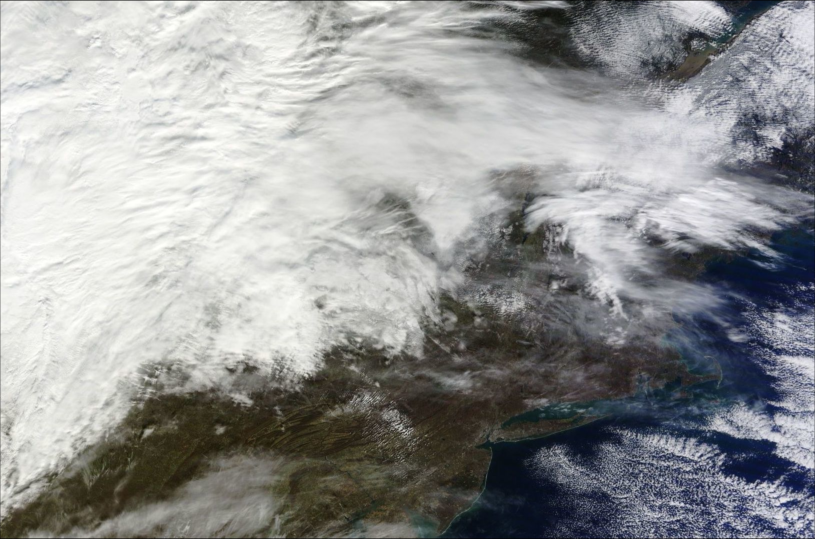

In [3]:
imgc = load("./2014/11.8.14.jpeg")

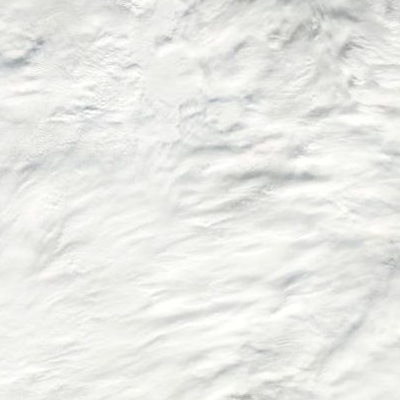

In [4]:
im_cloud = imgc[100:499,100:499]

In [21]:
# features - red, blue, green. 
# labels - "cloud" , "not cloud"

# first dimension - features. 
# second dimension - training points 400x400 cloud, 600x600 not cloud. totally 16e4 + 36e4

imsub1 = convert(Array{RGB{Float64}},im_cloud)
imsub1_hsv = HSV.(imsub1)
label = Array{String}(520000)
train = zeros(3,52e4)
for i in 1:400
    for j in 1:400
        k = 400*(i-1)+j
        train[1,k] = imsub1_hsv[i,j].h/255
        train[2,k] = imsub1_hsv[i,j].s*10
        train[3,k] = imsub1_hsv[i,j].v
        label[k] = "cloud"
    end
end 

In [22]:
dump(imsub1_hsv[120,120])

ColorTypes.HSV{Float64}
  h: Float64 60.0
  s: Float64 0.008097165991902805
  v: Float64 0.9686274509803922


In [23]:
i = 120
j = 120
k = 400*119 + 120
train[:,k]

3-element Array{Float64,1}:
 0.235294 
 0.0809717
 0.968627 

In [24]:
label[k]

"cloud"

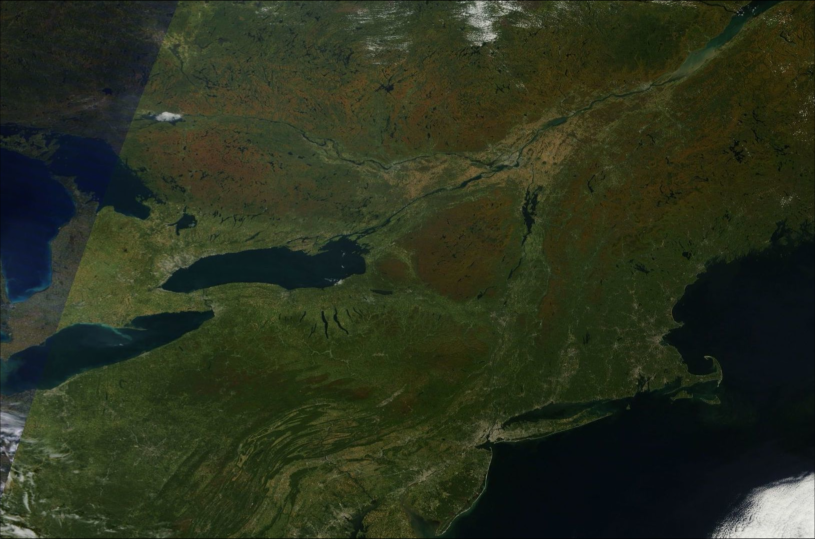

In [11]:
imgg = load("./2014/9.27.14.jpeg")

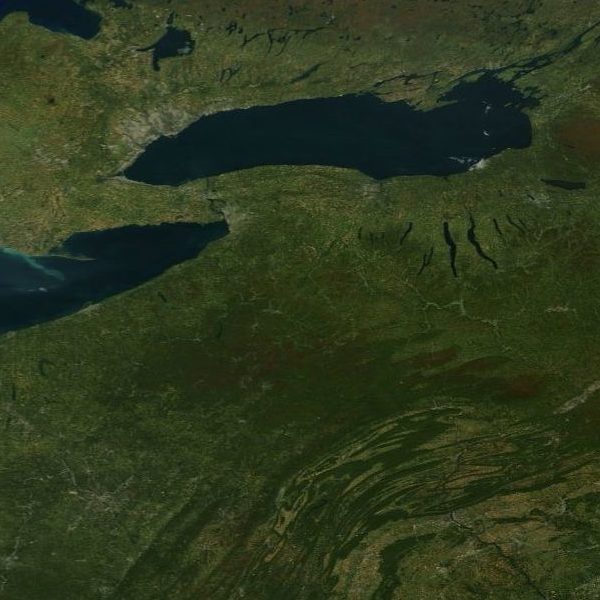

In [25]:
im_green = imgg[400:999,200:799]

In [26]:
# features - red, blue, green. 
# labels - "cloud" , "not cloud"

# first dimension - features. 
# second dimension - training points 400x400 cloud, 600x600 not cloud. totally 16e4 + 36e4
k0 = 400*399 + 400
imsub2 = convert(Array{RGB{Float64}},im_green)
imsub2_hsv = HSV.(imsub2)
for i in 1:600
    for j in 1:600
        k = 600*(i-1)+j + k0
        train[1,k] = imsub2_hsv[i,j].h/255
        train[2,k] = imsub2_hsv[i,j].s*10
        train[3,k] = imsub2_hsv[i,j].v
        label[k] = "not cloud"
    end
end 

In [27]:
train[:,k0]

3-element Array{Float64,1}:
 0.282353
 0.211864
 0.92549 

In [28]:
label[k0]

"cloud"

In [29]:
train[:,k0+1]

3-element Array{Float64,1}:
 0.885449
 7.03704 
 0.211765

In [30]:
label[k0+1]

"not cloud"

In [31]:
using LIBSVM

In [32]:
p = randperm(520000)

instances = train[:,p]
plabel = label[p]

train_instances = instances[:,1:39999]
train_labels = plabel[1:39999]

test_instances = instances[:,40000:end]
test_labels = plabel[40000:end]

model = svmtrain(train_instances,train_labels);

(predicted_labels, decision_values) = svmpredict(model, test_instances);

# Compute accuracy
@printf "Accuracy: %.2f%%\n" mean((predicted_labels .== test_labels))*100

Accuracy: 100.00%


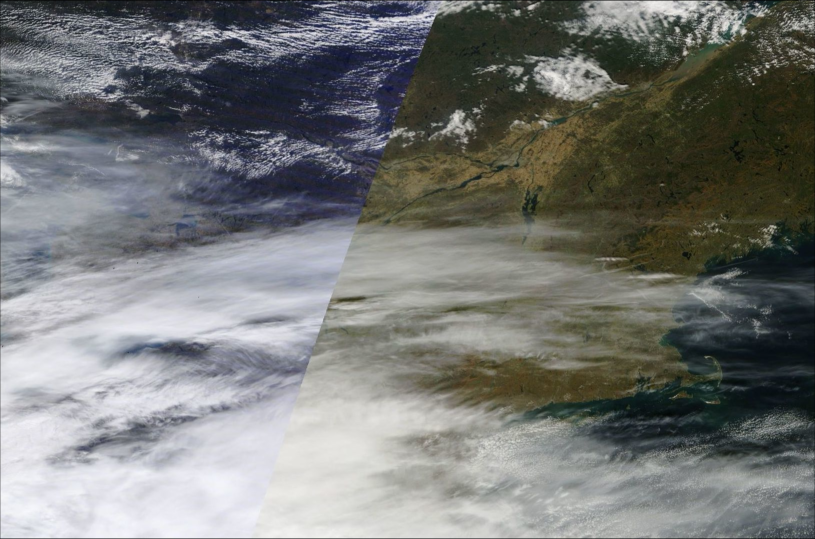

In [33]:
timg = load("./2015/10.27.15.jpeg")

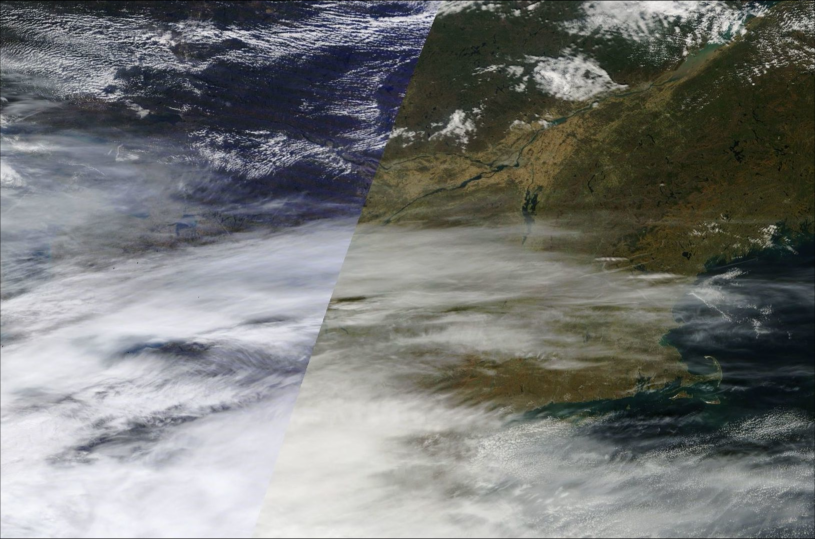

In [34]:
timg_arr = convert(Array{RGB{Float64}},timg)

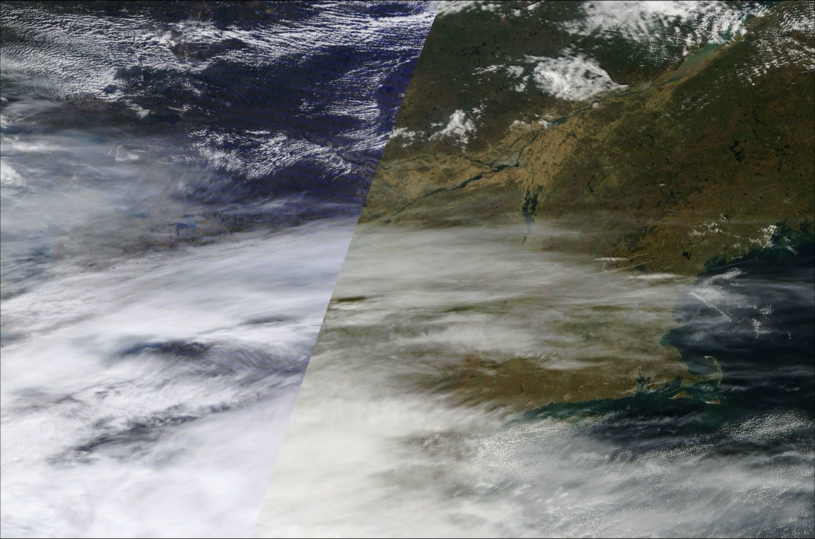

In [35]:
timg_hsv = HSV.(timg_arr)

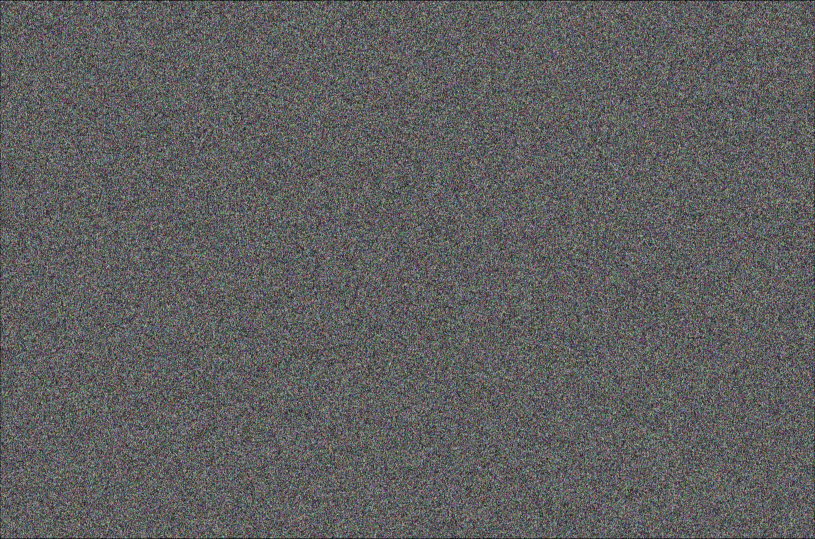

In [42]:
newimg = rand(HSV{Float64},1076,1629)

In [43]:
c = 0
for i in 1:1076
    for j in 1:1629
        test = reshape([timg_hsv[i,j].h/255,timg_hsv[i,j].s*10,timg_hsv[i,j].v],3,1)
        (pred,decision_val) = svmpredict(model,test)
        if(pred[1]=="cloud")
            v = 0.0
            c += 1
        else 
            v = timg_hsv[i,j].v
        end
        newimg[i,j] = HSV{Float64}(timg_hsv[i,j].h,timg_hsv[i,j].s,v)
     end
end

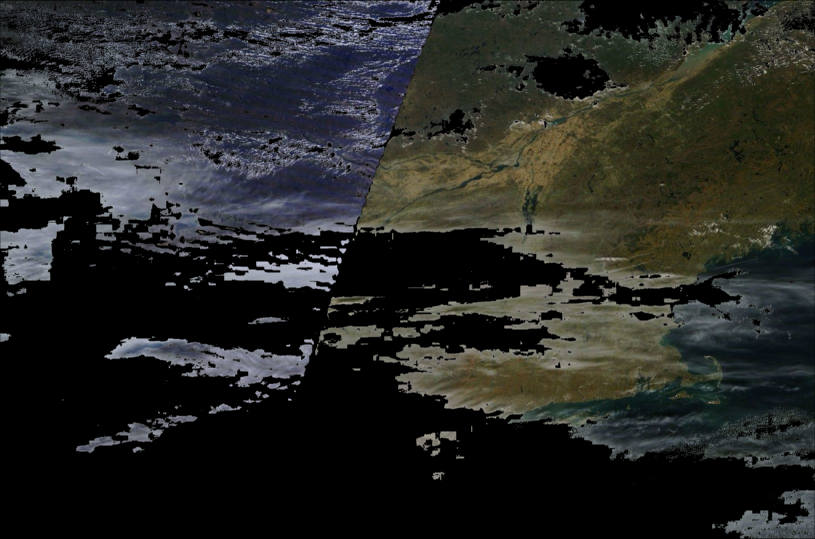

In [44]:
newimg

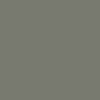

In [45]:
tpix = timg[550:550,1200:1200]

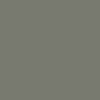

In [46]:
tarr = convert(Array{RGB{Float64}},tpix)

In [30]:
test = reshape([tarr[1,1].r;tarr[1,1].g;tarr[1,1].b],3,1)

3×1 Array{Float64,2}:
 0.470588
 0.478431
 0.435294

In [31]:
(prediction, val) = svmpredict(model, test);
println(prediction)

String["not cloud"]


In [32]:
typeof(model)

LIBSVM.SVM{String}

In [47]:
readdir("./")

16-element Array{String,1}:
 ".ipynb_checkpoints"              
 "2014"                            
 "2015"                            
 "2016"                            
 "base-subimage.png"               
 "clouddetection1.png"             
 "clouddetection2.png"             
 "Foliage.ipynb"                   
 "Foliage2 (1).html"               
 "Foliage2.html"                   
 "Foliage2.ipynb"                  
 "modifiedreconctructedimage40.png"
 "original-image40.png"            
 "reconstructedimage40.png"        
 "svm-cloud.jld"                   
 "Untitled1.ipynb"                 

In [48]:
i = 0 #folder number
imgpath = []
for (root, dirs, files) in walkdir(".")
    println("i is $i")
    println("Directories in $root")
    for dir in dirs
        println(joinpath(root, dir)) # path to directories
    end
    println("Files in $root")
    for file in files
        if(2<=i && i<=4)
            a = joinpath(root, file)
            push!(imgpath,a)
        end
    end 
    i = i + 1
end
size(imgpath)

i is 0
Directories in .
.\.ipynb_checkpoints
.\2014
.\2015
.\2016
Files in .
i is 1
Directories in .\.ipynb_checkpoints
Files in .\.ipynb_checkpoints
i is 2
Directories in .\2014
Files in .\2014
i is 3
Directories in .\2015
Files in .\2015
i is 4
Directories in .\2016
Files in .\2016


(186,)

In [50]:
# making hue,sat,val matrix for entire dataset. 
# take 10 images 
# in each image take the top left 100x100 block.

m = 100  # No. of images in 3 years
x = 99 # In each image no. of rows considered.
y = 99 # In each image no. of cols considered. 

n = (x+1)*(y+1) # No. of pixels in each image 

# choosing sub-image with start as the top left co-ordinates. 
# the image is - [x0:x0+x,y0:y0+y]
x0 = 200
y0 = 200

hue = zeros(m,n)
sat = zeros(m,n)
val = zeros(m,n)

obs = Array{Tuple{Int64,Int64},1}()
lobs = 0
for k = 1:m
    println("making rgb and hsv of image $k, starting at coordinates $x0,$y0 and extracting hue,sat,val")
    image = imgpath[k]
    load(image)
    im_rgb = convert(Array{RGB{Float64}},load(image))
    im_hsv = HSV.(im_rgb)
    
    for i in x0:x0+x
        for j in y0:y0+y
            i1 = i - x0 + 1
            j1 = j - y0 + 1
            
            test = reshape([im_hsv[i,j].h/255; im_hsv[i,j].s*10; im_hsv[i,j].v],3,1)
            (pred, decision_val) = svmpredict(model, test);
            
           if(pred[1] == "not cloud")
                lobs += 1
                push!(obs,(k,y*(i1-1)+j1))
            end
            
            #println("row $k and col $(y*(i1-1)+j1)")
            hue[k,(y+1)*(i1-1)+j1] = im_hsv[i,j].h/255
            #println("hue saved $(im_hsv[i,j].h/255)")
            
            sat[k,(y+1)*(i1-1)+j1] = (im_hsv[i,j].s)*100
            #println("sat saved $((im_hsv[i,j].s)*100)")
            
            #println(size(val))
            val[k,(y+1)*(i1-1)+j1] = im_hsv[i,j].v
            #println("val saved $(im_hsv[i,j].v)")
        end
    end
end
println(size(hue))
println(size(obs))

println(lobs)
println("done") 

making rgb and hsv of image 1, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 2, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 3, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 4, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 5, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 6, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 7, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 8, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 9, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 10, starting at coordinates 200,200 and extracting hue,sat,val
making rgb and hsv of image 11, starting at coordinates 200,200 and extracting hue,sat,val
making r

In [51]:
println(size(obs))

(291040,)


In [52]:
# checking size and values at random indices. 
lobs, = size(obs)
println("number of observed pixels - $(lobs)")
println("total number of pixels - $(m*n)")
fraction = lobs/(m*n)
println("fraction observed - $(fraction)")

number of observed pixels - 291040
total number of pixels - 1000000
fraction observed - 0.29104


In [53]:
function lowrankfoliage(A,m,n,k,o)
    # A : dataset mxn. 
    # m is number of images 
    # n is number of pixels in each image = (1076x1629)
     
	loss = QuadLoss()
	r = QuadReg(.1)
	glrm = GLRM(A,loss,r,r,k,obs=o)
    init_svd!(glrm)
	X,Y,ch = LowRankModels.fit!(glrm)
	println("Convergence history:",ch.objective)
	return A,X,Y,ch
end

lowrankfoliage (generic function with 1 method)

In [54]:
function lowrankfoliage2(A,m,n,k,o)
    # A : dataset mxn. 
    # m is number of images 
    # n is number of pixels in each image = (1076x1629)
     
	loss = QuadLoss()
	r = NonNegConstraint()
	glrm = GLRM(A,loss,r,r,k,obs=o)
    init_svd!(glrm)
	X,Y,ch = LowRankModels.fit!(glrm)
	println("Convergence history:",ch.objective)
	return A,X,Y,ch
end

lowrankfoliage2 (generic function with 1 method)

In [55]:
# Warning ! Computationally heavy. 
#h,X,Y,ch = lowrankfoliage(hue,186,1752804,5)

h,hX,hY,ch = lowrankfoliage(hue,m,n,20,obs)
newh = hX'*hY


Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Union{Int64, Range{Int64}}}, ::Int64) at .\deprecated.jl:57
 [3] get_yidxs(::Array{LowRankModels.Loss,1}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\losses.jl:77
 [4] #init_svd!#83(::Bool, ::Bool, ::Float64, ::Function, ::LowRankModels.GLRM) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\initialize.jl:44
 [5] lowrankfoliage(::Array{Float64,2}, ::Int64, ::Int64, ::Int64, ::Array{Tuple{Int64,Int64},1}) at .\In[53]:9
 [6] include_string(::String, ::String) at .\loading.jl:515
 [7] include_string(::Module, ::String, ::String) at C:\Users\rm949\.julia\v0.6\Compat\src\Compat.jl:478
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\rm949\.julia\v0.6\IJulia\src\execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at C:\Users\rm949\.julia\v0.6\IJulia\src\eventloop.jl:8
 [10] (::IJulia.##14#17)() at .\task.jl:335
while loading In[55], in expression starting on line 4
Stacktrace:
 [1] depwarn(::St

Fitting GLRM


  likely near In[55]:4
  likely near In[55]:4
  likely near In[55]:4
Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] sumabs2(::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}) at .\deprecated.jl:57
 [3] evaluate(::LowRankModels.QuadReg, ::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\regularizers.jl:57
 [4] #calc_penalty#62(::Array{Union{Int64, Range{Int64}},1}, ::Function, ::LowRankModels.GLRM, ::Array{Float64,2}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:97
 [5] (::LowRankModels.#kw##calc_penalty)(::Array{Any,1}, ::LowRankModels.#calc_penalty, ::LowRankModels.GLRM, ::Array{Float64,2}, ::Array{Float64,2}) at .\<missing>:0
 [6] #objective#57(::Array{Union{Int64, Range{Int64}},1}, ::Bool, ::Function, ::LowRankModels.GLRM, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:20
 [7] (::LowRa

Iteration 10: objective value = 3669.4048116491053



while loading In[55], in expression starting on line 4


Iteration 20: objective value = 1493.0759437416154
Iteration 30: objective value = 1057.1179409566337
Iteration 40: objective value = 865.4259828233619
Iteration 50: objective value = 754.5247648424221
Iteration 60: objective value = 684.3601488942026
Iteration 70: objective value = 636.6580681185003
Iteration 80: objective value = 600.7593652639388
Convergence history:[74020.8, 56784.3, 39361.1, 27946.8, 19867.4, 13825.5, 9784.8, 7133.17, 5498.55, 4398.5, 3669.4, 3139.0, 2760.35, 2465.37, 2241.84, 2053.43, 1900.5, 1766.48, 1659.6, 1568.99, 1493.08, 1424.13, 1363.32, 1307.8, 1259.54, 1215.44, 1177.35, 1142.62, 1112.09, 1083.5, 1057.12, 1031.33, 1007.51, 985.145, 965.034, 946.067, 928.865, 911.855, 895.622, 879.892, 865.426, 851.49, 838.897, 826.742, 815.424, 804.141, 793.248, 782.526, 772.84, 763.106, 754.525, 745.713, 737.689, 729.464, 722.13, 714.874, 708.313, 701.859, 696.23, 690.292, 684.36, 678.51, 673.137, 667.889, 663.173, 658.382, 653.83, 649.43, 645.199, 640.778, 636.658, 632.

100×10000 Array{Float64,2}:
 -6.10513e-58  -6.07278e-58  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.393284      0.381138        0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.431258      0.441382        0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.173726      0.168834        0.0  0.0  0.0  0.0  0.0  0.0  0.0
  6.67418e-59   3.33615e-59     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  6.99201e-58   6.21861e-58  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  9.24879e-59   8.98116e-59     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.38257e-58  -9.91598e-59     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.141466      0.139208        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -9.85474e-59  -1.18229e-58     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.271982      0.270596     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.27348e-58   8.84511e-59     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  4.06137e-59  -3.12469e-59     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮                          ⋱            ⋮                      
  0.0           0.0             0.0  0.0  0.0  0

In [56]:
# Warning ! Computationally heavy. 
#h,X,Y,ch = lowrankfoliage(hue,186,1752804,5)

s,sX,sY,ch = lowrankfoliage2(sat,m,n,80,obs)
news = sX'*sY
sdiff = norm(s-news)
println(sdiff)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Union{Int64, Range{Int64}}}, ::Int64) at .\deprecated.jl:57
 [3] get_yidxs(::Array{LowRankModels.Loss,1}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\losses.jl:77
 [4] #init_svd!#83(::Bool, ::Bool, ::Float64, ::Function, ::LowRankModels.GLRM) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\initialize.jl:44
 [5] lowrankfoliage2(::Array{Float64,2}, ::Int64, ::Int64, ::Int64, ::Array{Tuple{Int64,Int64},1}) at .\In[54]:9
 [6] include_string(::String, ::String) at .\loading.jl:515
 [7] include_string(::Module, ::String, ::String) at C:\Users\rm949\.julia\v0.6\Compat\src\Compat.jl:478
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\rm949\.julia\v0.6\IJulia\src\execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at C:\Users\rm949\.julia\v0.6\IJulia\src\eventloop.jl:8
 [10] (::IJulia.##14#17)() at .\task.jl:335
while loading In[56], in expression starting on line 4
Stacktrace:
 [1] depwarn(::S

Fitting GLRM


Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Tuple{Int64}) at .\deprecated.jl:57
 [3] Ac_mul_B at .\linalg\matmul.jl:115 [inlined]
 [4] Ac_mul_B at .\linalg\rowvector.jl:227 [inlined]
 [5] #row_objective#58(::Array{Union{Int64, Range{Int64}},1}, ::Bool, ::Function, ::LowRankModels.GLRM, ::Int64, ::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:29
 [6] row_objective(::LowRankModels.GLRM, ::Int64, ::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:27 (repeats 2 times)
 [7] #fit!#79(::LowRankModels.ConvergenceHistory, ::Bool, ::Array{Any,1}, ::Function, ::LowRankModels.GLRM, ::LowRankModels.ProxGradParams) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\algorithms\proxgrad.jl:138
 [8] #fit!#76(::Array{Any,1}, ::Function, ::LowRankModels.GLRM) at C:\Users\rm94

Iteration 10: objective value = 3.9440718637994635e8
Convergence history:[Inf, 

2.72293e38, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8, 3.94407e8]
1.994087955101766e17


In [57]:

v,vX,vY,ch = lowrankfoliage2(val,m,n,20,obs)
newv = vX'*vY
vdiff = norm(v-newv)
println(vdiff)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Union{Int64, Range{Int64}}}, ::Int64) at .\deprecated.jl:57
 [3] get_yidxs(::Array{LowRankModels.Loss,1}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\losses.jl:77
 [4] #init_svd!#83(::Bool, ::Bool, ::Float64, ::Function, ::LowRankModels.GLRM) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\initialize.jl:44
 [5] lowrankfoliage2(::Array{Float64,2}, ::Int64, ::Int64, ::Int64, ::Array{Tuple{Int64,Int64},1}) at .\In[54]:9
 [6] include_string(::String, ::String) at .\loading.jl:515
 [7] include_string(::Module, ::String, ::String) at C:\Users\rm949\.julia\v0.6\Compat\src\Compat.jl:478
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\rm949\.julia\v0.6\IJulia\src\execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at C:\Users\rm949\.julia\v0.6\IJulia\src\eventloop.jl:8
 [10] (::IJulia.##14#17)() at .\task.jl:335
while loading In[57], in expression starting on line 2
Stacktrace:
 [1] depwarn(::S

Fitting GLRM



Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Tuple{Int64}) at .\deprecated.jl:57
 [3] Ac_mul_B at .\linalg\matmul.jl:115 [inlined]
 [4] Ac_mul_B at .\linalg\rowvector.jl:227 [inlined]
 [5] #row_objective#58(::Array{Union{Int64, Range{Int64}},1}, ::Bool, ::Function, ::LowRankModels.GLRM, ::Int64, ::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:29
 [6] row_objective(::LowRankModels.GLRM, ::Int64, ::ArrayViews.ContiguousView{Float64,1,Array{Float64,2}}, ::Array{Float64,2}) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\evaluate_fit.jl:27 (repeats 2 times)
 [7] #fit!#79(::LowRankModels.ConvergenceHistory, ::Bool, ::Array{Any,1}, ::Function, ::LowRankModels.GLRM, ::LowRankModels.ProxGradParams) at C:\Users\rm949\.julia\v0.6\LowRankModels\src\algorithms\proxgrad.jl:138
 [8] #fit!#76(::Array{Any,1}, ::Function, ::LowRankModels.GLRM) at C:\Users\rm9

Iteration 10: objective value = 1886.2131976119858


while loading In[57], in expression starting on line 2



Iteration 20: objective value = 1320.2289242930924
Iteration 30: objective value = 1037.6134160425236
Iteration 40: objective value = 865.200371066353
Iteration 50: objective value = 750.4821758256796
Iteration 60: objective value = 674.4384663443585
Iteration 70: objective value = 619.9235530412247
Iteration 80: objective value = 579.0018099301772
Convergence history:[Inf, 2.11156e6, 13019.6, 4475.34, 3225.98, 2742.96, 2495.02, 2317.06, 2194.05, 1999.53, 1886.21, 1799.42, 1725.9, 1660.02, 1599.92, 1544.12, 1492.34, 1444.3, 1399.95, 1358.62, 1320.23, 1283.74, 1249.87, 1217.43, 1186.65, 1158.63, 1130.55, 1104.43, 1080.55, 1058.31, 1037.61, 1015.64, 995.794, 977.145, 958.909, 941.847, 925.164, 909.483, 894.148, 879.377, 865.2, 851.727, 839.241, 826.735, 815.006, 804.132, 792.611, 782.787, 770.6, 760.465, 750.482, 741.747, 733.265, 725.254, 717.218, 709.502, 701.906, 694.631, 687.507, 680.86, 674.438, 668.17, 662.055, 656.014, 650.093, 644.644, 639.328, 634.382, 629.466, 624.746, 619.924

In [44]:
satU, satS, satV = svd(sat)

([-0.0057577 0.00551938 … 4.34548e-16 -6.80879e-16; -0.0211013 -0.160309 … 1.01763e-17 9.21331e-17; … ; -0.0471818 0.00489937 … -4.51028e-17 4.16334e-17; -0.0094698 0.0122235 … -2.01228e-16 -1.50921e-16], [19267.2, 3539.56, 2756.8, 2356.6, 1745.6, 1451.73, 1368.79, 1338.94, 1263.7, 1251.3  …  28.3893, 26.6528, 23.225, 21.4859, 19.3435, 17.6725, 15.2133, 1.69597e-12, 1.69597e-12, 1.69597e-12], [-0.00837952 0.00567373 … 0.00475746 -0.00981353; -0.00807326 0.00501881 … 0.00292288 -0.00224405; … ; -0.00971415 0.00124258 … 0.000552616 -0.000237707; -0.00884717 -0.000871562 … 0.000707201 -0.000498899])

In [45]:
typeof(satS)

Array{Float64,1}

In [46]:
using Plots

In [47]:
#Pkg.build("URIParser.jl")
using PyPlot


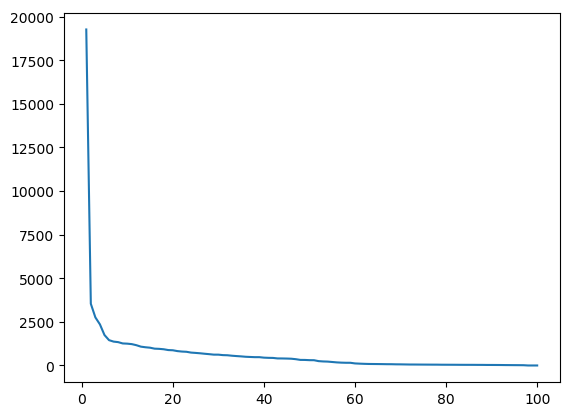

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007A9B5EB8>

In [48]:
axis1 = collect(1:100)
axis2 = satS
PyPlot.plot(axis1,axis2)

In [49]:
newU,newS,newV = svd(news)

([0.0 -5.55112e-17 … 0.0 -0.554877; 0.0 1.11022e-16 … 0.0 -0.640956; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 0.0], [1.41244e17, 7.63755e15, 5.71195e15, 3.45402e15, 2.62443e15, 1.28225e15, 5.4181e14, 4.16472e14, 3.42733e14, 8.47348e13  …  13.2271, 13.2271, 13.2271, 13.2271, 13.2271, 13.2271, 13.2271, 13.2271, 13.2271, 1.16034], [-0.0158907 0.0129823 … -0.0113355 -0.00141933; -0.0142399 0.00926834 … -9.83549e-5 0.00350973; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

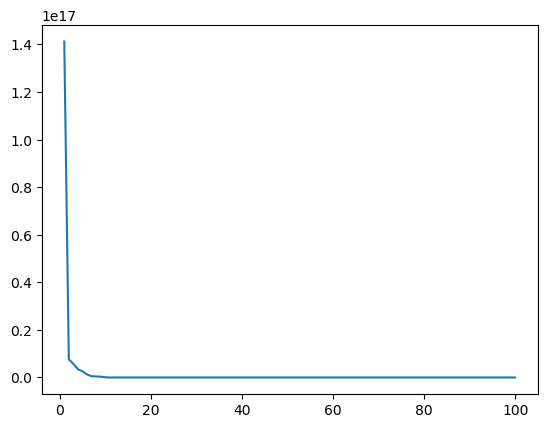

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007ACD5D68>

In [50]:
PyPlot.plot(collect(1:100),newS)

In [51]:
newS[12] - newS[75]

0.0

In [58]:
original = []
reconstructed = []
for k in 1:m 
    o = rand(HSV{Float64},x+1,y+1)
    r = rand(HSV{Float64},x+1,y+1)
    for i in x0:x0+x
        for j in y0:y0+y
            i1 = i - x0 + 1
            j1 = j - x0 + 1
        
            o[i1,j1] = HSV{Float64}(hue[k,(y+1)*(i1-1)+j1]*255,sat[k,(y+1)*(i1-1)+j1]/100,val[k,(y+1)*(i1-1)+j1])
            r[i1,j1] = HSV{Float64}(newh[k,(y+1)*(i1-1)+j1]*255,news[k,(y+1)*(i1-1)+j1]/100,newv[k,(y+1)*(i1-1)+j1])
        end
    end
    push!(original,o)
    push!(reconstructed,r)
end 

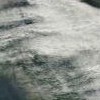

In [59]:
original[40]

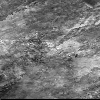

In [60]:
reconstructed[40]

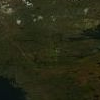

In [61]:
original[60]

In [62]:
dump(original[60][40,90])
original[60][40,90]

ColorTypes.HSV{Float64}
  h: Float64 76.0
  s: Float64 0.3658536585365853
  v: Float64 0.16078431372549018


In [63]:
dump(original[40][40,90])
original[40][40,90]

ColorTypes.HSV{Float64}
  h: Float64 67.49999999999997
  s: Float64 0.04145077720207255
  v: Float64 0.7568627450980392


In [64]:
dump(reconstructed[40][40,90])
reconstructed[40][40,90]

ColorTypes.HSV{Float64}
  h: Float64 116.2202437768589
  s: Float64 0.0
  v: Float64 0.5137544928264486


In [63]:
HSV{Float64}(79.296,0.3,0.54)

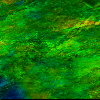

In [66]:
lr = reconstructed[40]
r = rand(HSV{Float64},x+1,y+1)
for i in 1:x+1
    for j in 1:y+1
        r[i,j] = HSV{Float64}(lr[i,j].h,1,lr[i,j].v)
    end
end
r

In [68]:
HSV{Float64}(80.0,0.0,0.8)